# Zomato Resturant Project

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
#loading and merging two datasets

#Dataset 1:

df1=pd.read_csv('zomato.csv',encoding='latin1')  


#Dataset 2:
df2 = pd.read_excel('Country-Code.xlsx')


#Merging of dataset
df = pd.merge(df2,df1,how='left',on='Country Code')

In [13]:
df.head(1)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140


# EDA(Exploratory Data Analysis)

In [15]:
#checking the shape of dataset
df.shape

(9551, 22)

There are 9551 rows and 22 Columns are present in Dataset

In [16]:
# checking columns in Dataset

print('Dataset columns are',df.columns)

Dataset columns are Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [17]:
# checking duplicate values in the dataset

df.duplicated().sum()

0

There are 0 Duplicates in dataset

In [18]:
# checking null values in the dataset

df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are 9 Null values are present in Cuisines column in dataset

<Axes: >

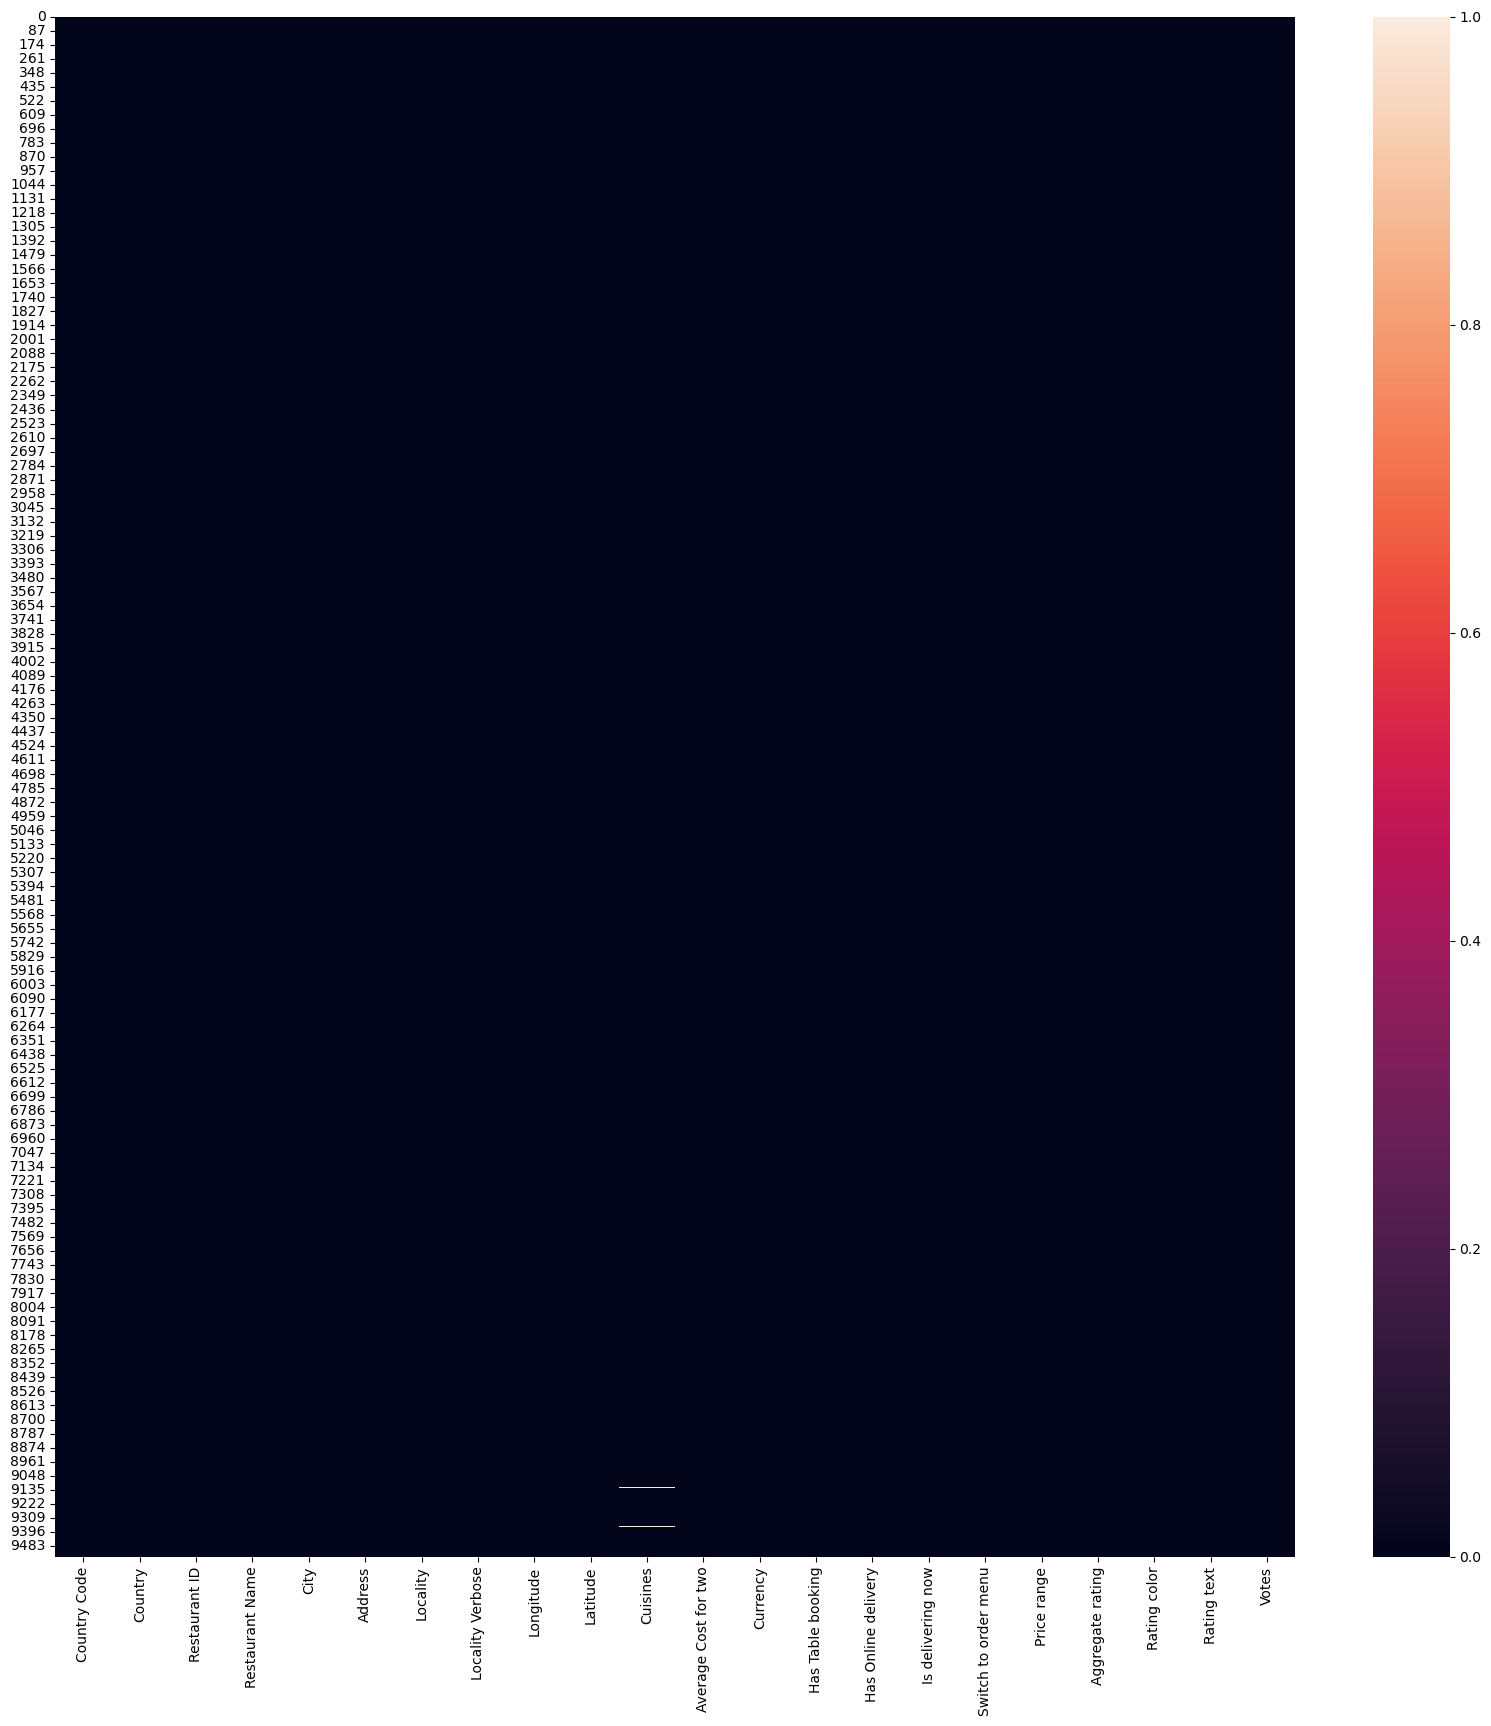

In [20]:
# Heatmap of null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [21]:
# Cousine column is categorical column so will fill nulls by mode method

df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [24]:
#Checking Null again 

df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

NO Null Values present

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

There are 3 types of data are present in dataset: 1.int   2.Float  3.Object

In [26]:
#Statistical info

df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Observation:**
    
**Country Code:**
The Country Code column spans values from 1 to 216, indicating representation from multiple countries.
The prevalence of the value 1 suggests potential dominance by a single country in the dataset.

**Restaurant ID:**
The Restaurant ID column exhibits a broad range of values, from 53 to 18,500,650, indicating potential data skewness.
Notably high standard deviation (8,791) emphasizes data distribution variability.

**Longitude and Latitude:**
Longitude and Latitude columns likely represent geographic coordinates.
Longitude spans from approximately -157.95 to 174.83, and Latitude ranges from approximately -41.33 to 55.98.

**Average Cost for Two:**
The Average Cost for Two column displays a wide value range (0 to 800,000), suggesting right-skewed data.
A notable standard deviation (16,121) indicates significant variability.

**Price Range:**
Price Range values (1 to 4) signify different restaurant price levels.
The most common price range is observed as 2.

**Aggregate Rating:**
Aggregate Rating ranges from 0.0 to 4.9, with a mean rating of approximately 2.67.

**Votes:**
Votes column indicates restaurant vote counts (0 to 10,934), with right-skewed data.
High standard deviation (430) points to voting distribution variability.

In [27]:
# Checking Unique values in columns

for i in df.columns:
    print(i)
    print(df[i].unique())
    print('--'*30)

Country Code
[  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216]
------------------------------------------------------------
Country
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
------------------------------------------------------------
Restaurant ID
[ 3400025  3400341  3400005 ... 17697332 17694056 17559793]
------------------------------------------------------------
Restaurant Name
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]
------------------------------------------------------------
City
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 

In [29]:
#Selecting Unnecessaru columns by above analysis

notrequired_columns = ['Restaurant ID',#This is unique for every restorent
                       'Address',#this is unique for every restorent
                       'Switch to order menu',#there is only one value NO
                       'Locality Verbose',#we have also city longitude latitude so we dont need this
                       'Locality']##we have also city longitude latitude so we dont need this

In [30]:
#dropping unnecessary_columns columns

df.drop(notrequired_columns,axis=1,inplace=True)


In [32]:
df.head(1)

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140


In [33]:
# Saperating Numerical Discreate Contineous   Categorical  and Datetime columns


numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
datetime_feature = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Datetime Feature Count: {}".format(len(datetime_feature)))

Numerical Features Count 7
Discrete feature Count 2
Continuous feature Count 5
Categorical feature Count 10
Datetime Feature Count: 0


In [34]:
# Get the indices of the top 60 cuisines

top_cuisine_indices = df.Cuisines.value_counts().index[:65]




# Use .loc to access the rows with the top cuisines

df = df[df.Cuisines.isin(top_cuisine_indices)]

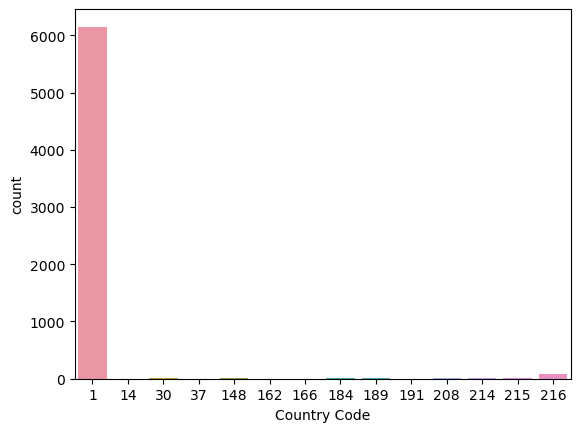

In [37]:
#Univariate Analysis

sns.countplot(x='Country Code',data=df)
plt.show()

Ovservation:

1 is country code of india and count of indian rastaurant is higher then other

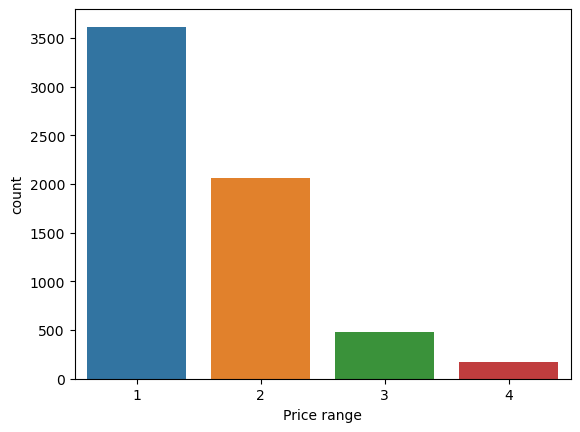

In [38]:
sns.countplot(x='Price range',data=df)
plt.show()

Ovservation:

We can see, Price range of 1 has maximum price range followed by 2.

All Price range are decreasing in order.

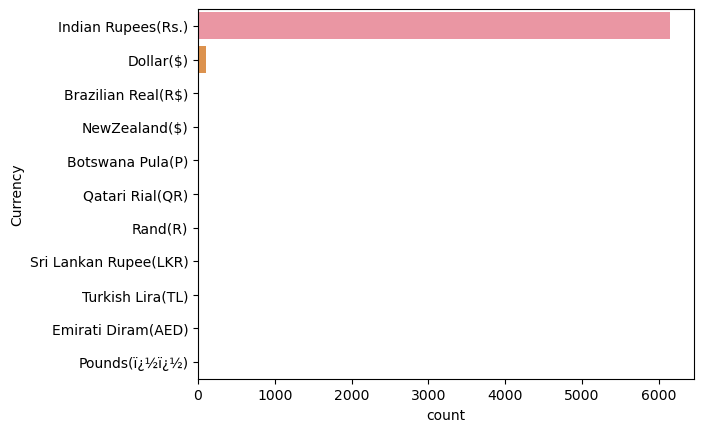

In [39]:
sns.countplot(y='Currency',data=df)
plt.show()

Primary Business Presence in India:
The 'Currency' analysis strongly indicates that Indian Rupees (Rs.) is the predominant currency, suggesting Zomato's primary business focus in India.

Dominant Country Code 1:
The large number of restaurants with 'Country Code' 1, corresponding to India, reinforces the inference that Zomato has a substantial presence in the Indian market.

Secondary Presence in Dollar() Regions:
Dollar() emerges as the second most used currency, implying Zomato's operations in regions where the US Dollar is the preferred currency.

Limited Presence in Other Currencies:
The relatively low usage of other currencies in the dataset suggests that Zomato may not have a significant operational presence in those countries compared to India and Dollar($) regions.

Geographical Business Strategy:
The distribution of currencies aligns with Zomato's strategic focus, highlighting a concentration in India and regions where the US Dollar is prevalent, showcasing a targeted and region-specific business approach.

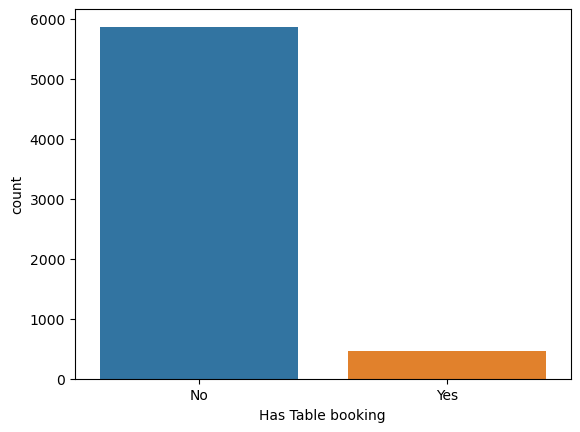

In [40]:
sns.countplot(x='Has Table booking',data=df)
plt.show()

Limited Table Booking Availability:
The analysis reveals that a significant majority of restaurants on Zomato do not offer table booking services ('No'), indicating that this feature is not widely available across listed establishments.

Exceptions with Table Booking ('Yes'):
Despite the predominant trend, there are exceptions where some restaurants do provide table booking services ('Yes'), implying a selective offering of this feature within the platform.

Potential Affiliation or Zomato-Owned Establishments:
The presence of establishments offering table booking services suggests that Zomato may either have its own restaurants or partner with specific venues. This affiliation allows Zomato to extend its services beyond a traditional restaurant listing platform, providing a more comprehensive experience with the ability to facilitate reservations at these particular dining locations.

In [42]:
#Which countries do have online deliveries option

country=df[df['Has Online delivery']=='Yes'].Country.value_counts()
country

India    1600
UAE         5
Name: Country, dtype: int64

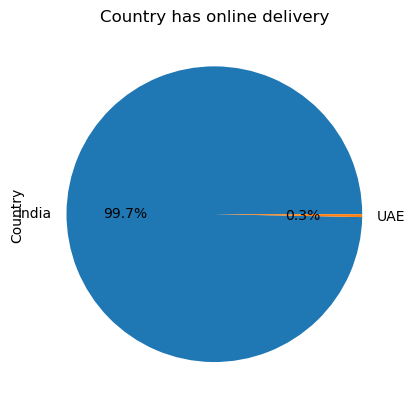

In [43]:
country.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()

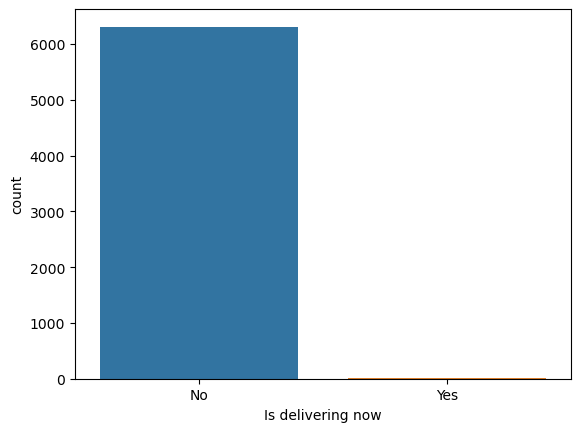

In [44]:
sns.countplot(x='Is delivering now',data=df)
plt.show()

In [45]:
city_values = df.City.value_counts().values
city_index = df.City.value_counts().index

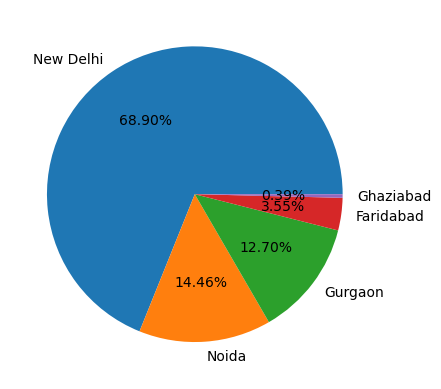

In [46]:
plt.pie(city_values[:5],labels=city_index[:5],autopct='%1.2f%%')
plt.show()

1. **Concentration in Delhi NCR:**
   - Approximately 68.90% of Zomato's restaurant listings are concentrated in New Delhi, emphasizing a significant presence in the Delhi NCR region.

2. **Prominence of New Delhi and Noida:**
   - New Delhi and Noida emerge as the top locations, indicating that Zomato strategically focuses on these prominent cities within the Delhi NCR region.

3. **Strong Foothold in Delhi NCR:**
   - The high representation of restaurants in New Delhi and Noida underscores Zomato's robust operational presence and strong foothold in the Delhi NCR region, implying extensive utilization and establishment of the platform in this specific geographic area.

In [47]:
# Find top 10 Cuisine
cuisin_val=df.Cuisines.value_counts().values
cuisin_index = df.Cuisines.value_counts().index

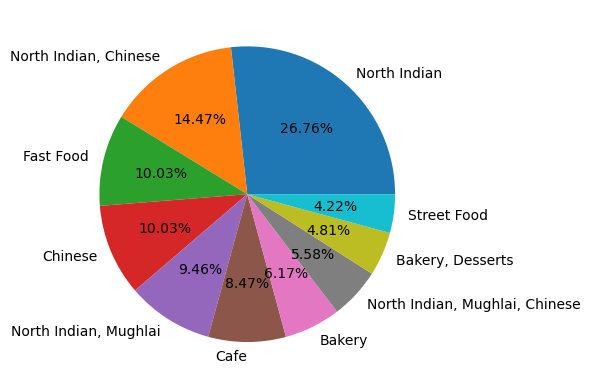

In [48]:
plt.pie(cuisin_val[:10],labels=cuisin_index[:10],autopct='%1.2f%%')
plt.show()

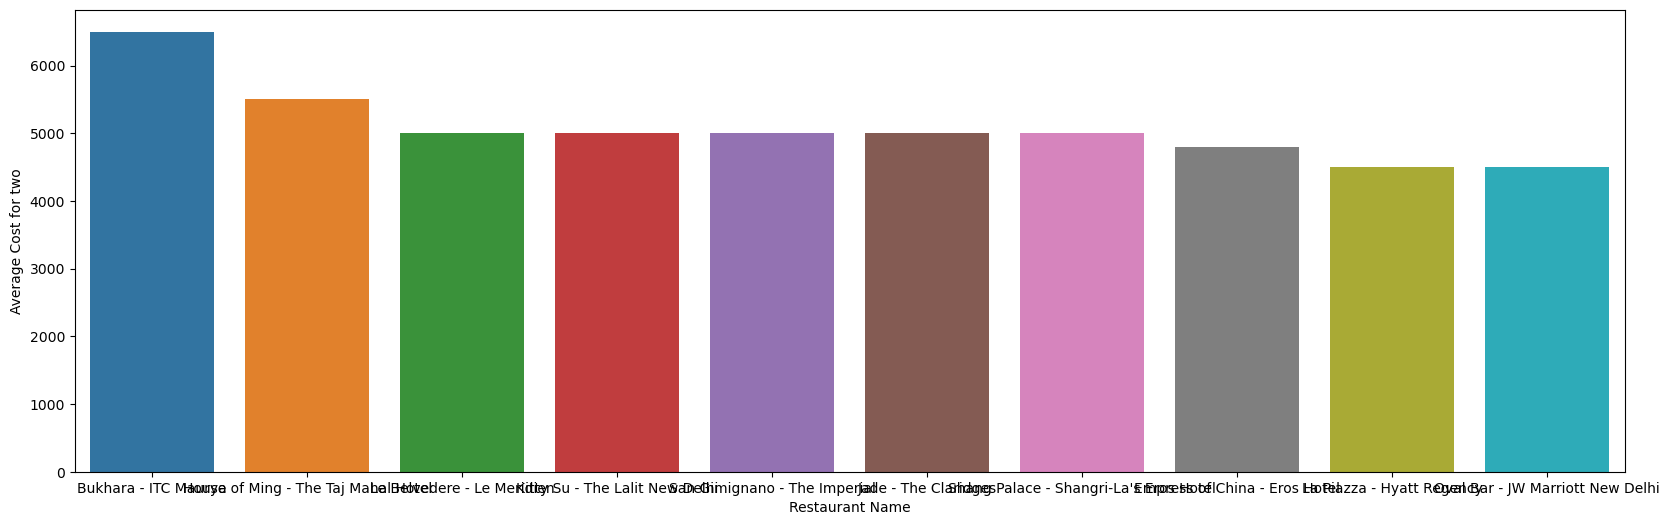

In [49]:
#Bivariate Analysis


plt.figure(figsize=(20,6))
data = df.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=data)
plt.show()

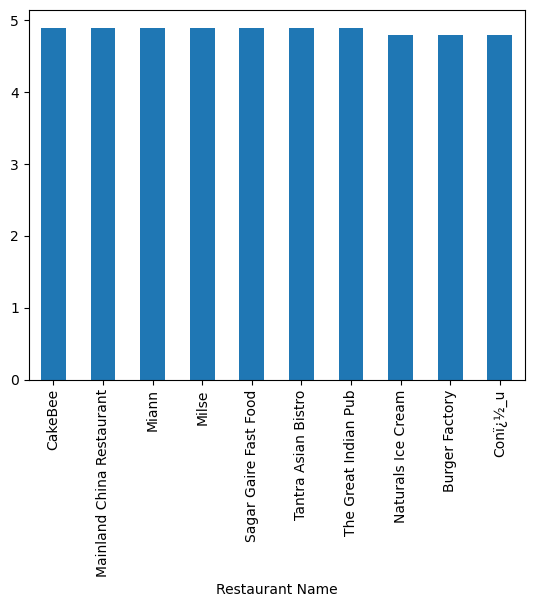

In [50]:
df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

Obervation:
    
Upon analyzing restaurant data, the following insights emerge concerning the top-rated establishments with the highest average aggregate ratings:

CakeBee, Mainland China Restaurant, Miann, Milse, Sagar Gaire Fast Food, Tantra Asian Bistro, The Great Indian Pub (All rated 4.9):

These restaurants boast an exceptional average aggregate rating of 4.9, indicative of outstanding customer satisfaction and likely reflective of their commitment to providing exceptional food and service quality.
Naturals Ice Cream and Burger Factory (Both rated 4.8):

These restaurants also secure top positions with an impressive average aggregate rating of 4.8, showcasing their dedication to delivering excellent dining experiences.
Coní_u (Rated 4.8):

Coní_u stands out as another highly-rated restaurant, earning an average aggregate rating of 4.8. This highlights its popularity among customers and consistent delivery of high-quality dining experiences.
These findings underscore the exceptional performance of these restaurants in ensuring customer satisfaction. The consistently high ratings and positive reviews on the Zomato platform suggest that patrons can anticipate highly positive dining experiences at these establishments.

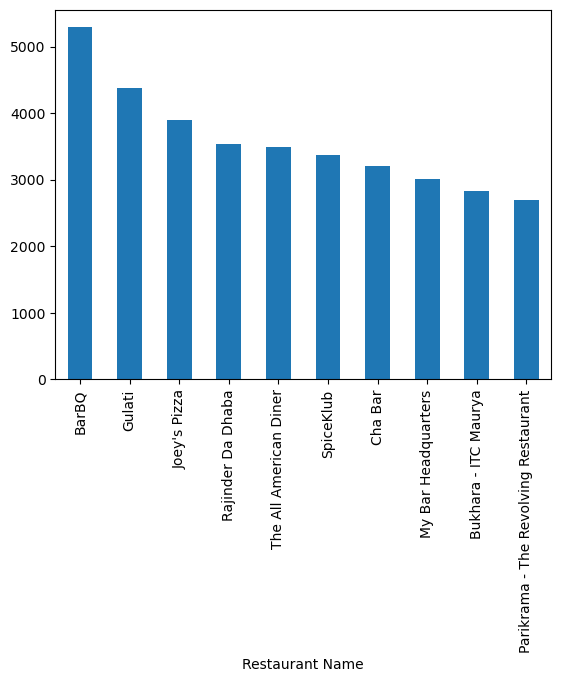

In [51]:
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

In [52]:
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10)

Restaurant Name
BarBQ                                   5288.0
Gulati                                  4373.0
Joey's Pizza                            3903.5
Rajinder Da Dhaba                       3530.0
The All American Diner                  3495.0
SpiceKlub                               3370.0
Cha Bar                                 3206.0
My Bar Headquarters                     3010.0
Bukhara - ITC Maurya                    2826.0
Parikrama - The Revolving Restaurant    2689.0
Name: Votes, dtype: float64

Top-Rated Restaurants by Votes:

1. **BarBQ (Avg Votes: 5288.0):**
   Leads with the highest average votes, indicating a substantial and engaged customer base.


2. **Gulati (Avg Votes: 4373.0):**
   Secures second spot, reflecting popularity and active customer engagement.


3. **Joey's Pizza (Avg Votes: 3903.5):**
   Ranks prominently with considerable average votes, showcasing customer participation.


4. **Rajinder Da Dhaba (Avg Votes: 3530.0):**
   Maintains a strong presence with a notable average vote count.


5. **The All American Diner (Avg Votes: 3495.0):**
   Holds a high average vote count, indicating a loyal and engaged customer base.


6. **SpiceKlub (Avg Votes: 3370.0):**
   Presence in top-rated list suggests substantial customer engagement and reviews.


7. **Cha Bar (Avg Votes: 3206.0):**
   Known for tea and snacks, boasts a high average vote count.


8. **My Bar Headquarters (Avg Votes: 3010.0):**
   Secures its position with a significant average vote count.


9. **Bukhara - ITC Maurya (Avg Votes: 2826.0):**
   Maintains a strong presence, highlighting popularity among diners.


10. **Parikrama - The Revolving Restaurant (Avg Votes: 2689.0):**
   Completes the top 10 with a noteworthy average vote count.


These findings emphasize the popularity and engagement of these top-rated restaurants, evidenced by their high average number of votes, reflecting customer opinions and experiences.

In [53]:
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})


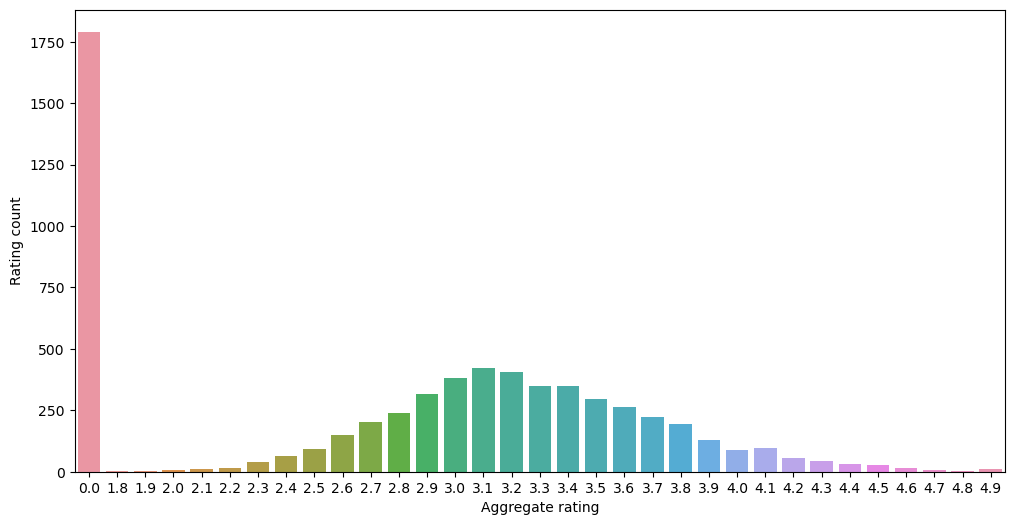

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)
plt.show()

When rating is between 4.5 to 4.9-----> Excellent

When rating is between 4.0 to 3.4-----> Very good

When rating is between 3.5 to 3.9-----> Good

When rating is between 2.5 to 2.9-----> Average

When rating is between 2.0 to 2.4-----> Poor

And 0 rating given by many people

In [55]:
df.head(1)

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140


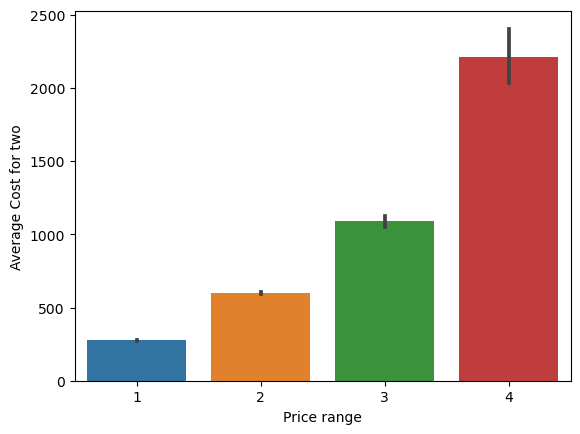

In [56]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)
plt.show()

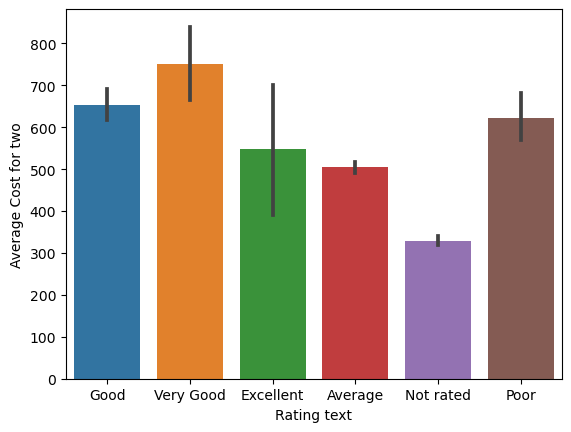

In [57]:
#BARPLOT B/W Rating text AND Average Cost for two

sns.barplot(x='Rating text',y='Average Cost for two',data=df)
plt.show()

**Checking Distribution of Numerical features**

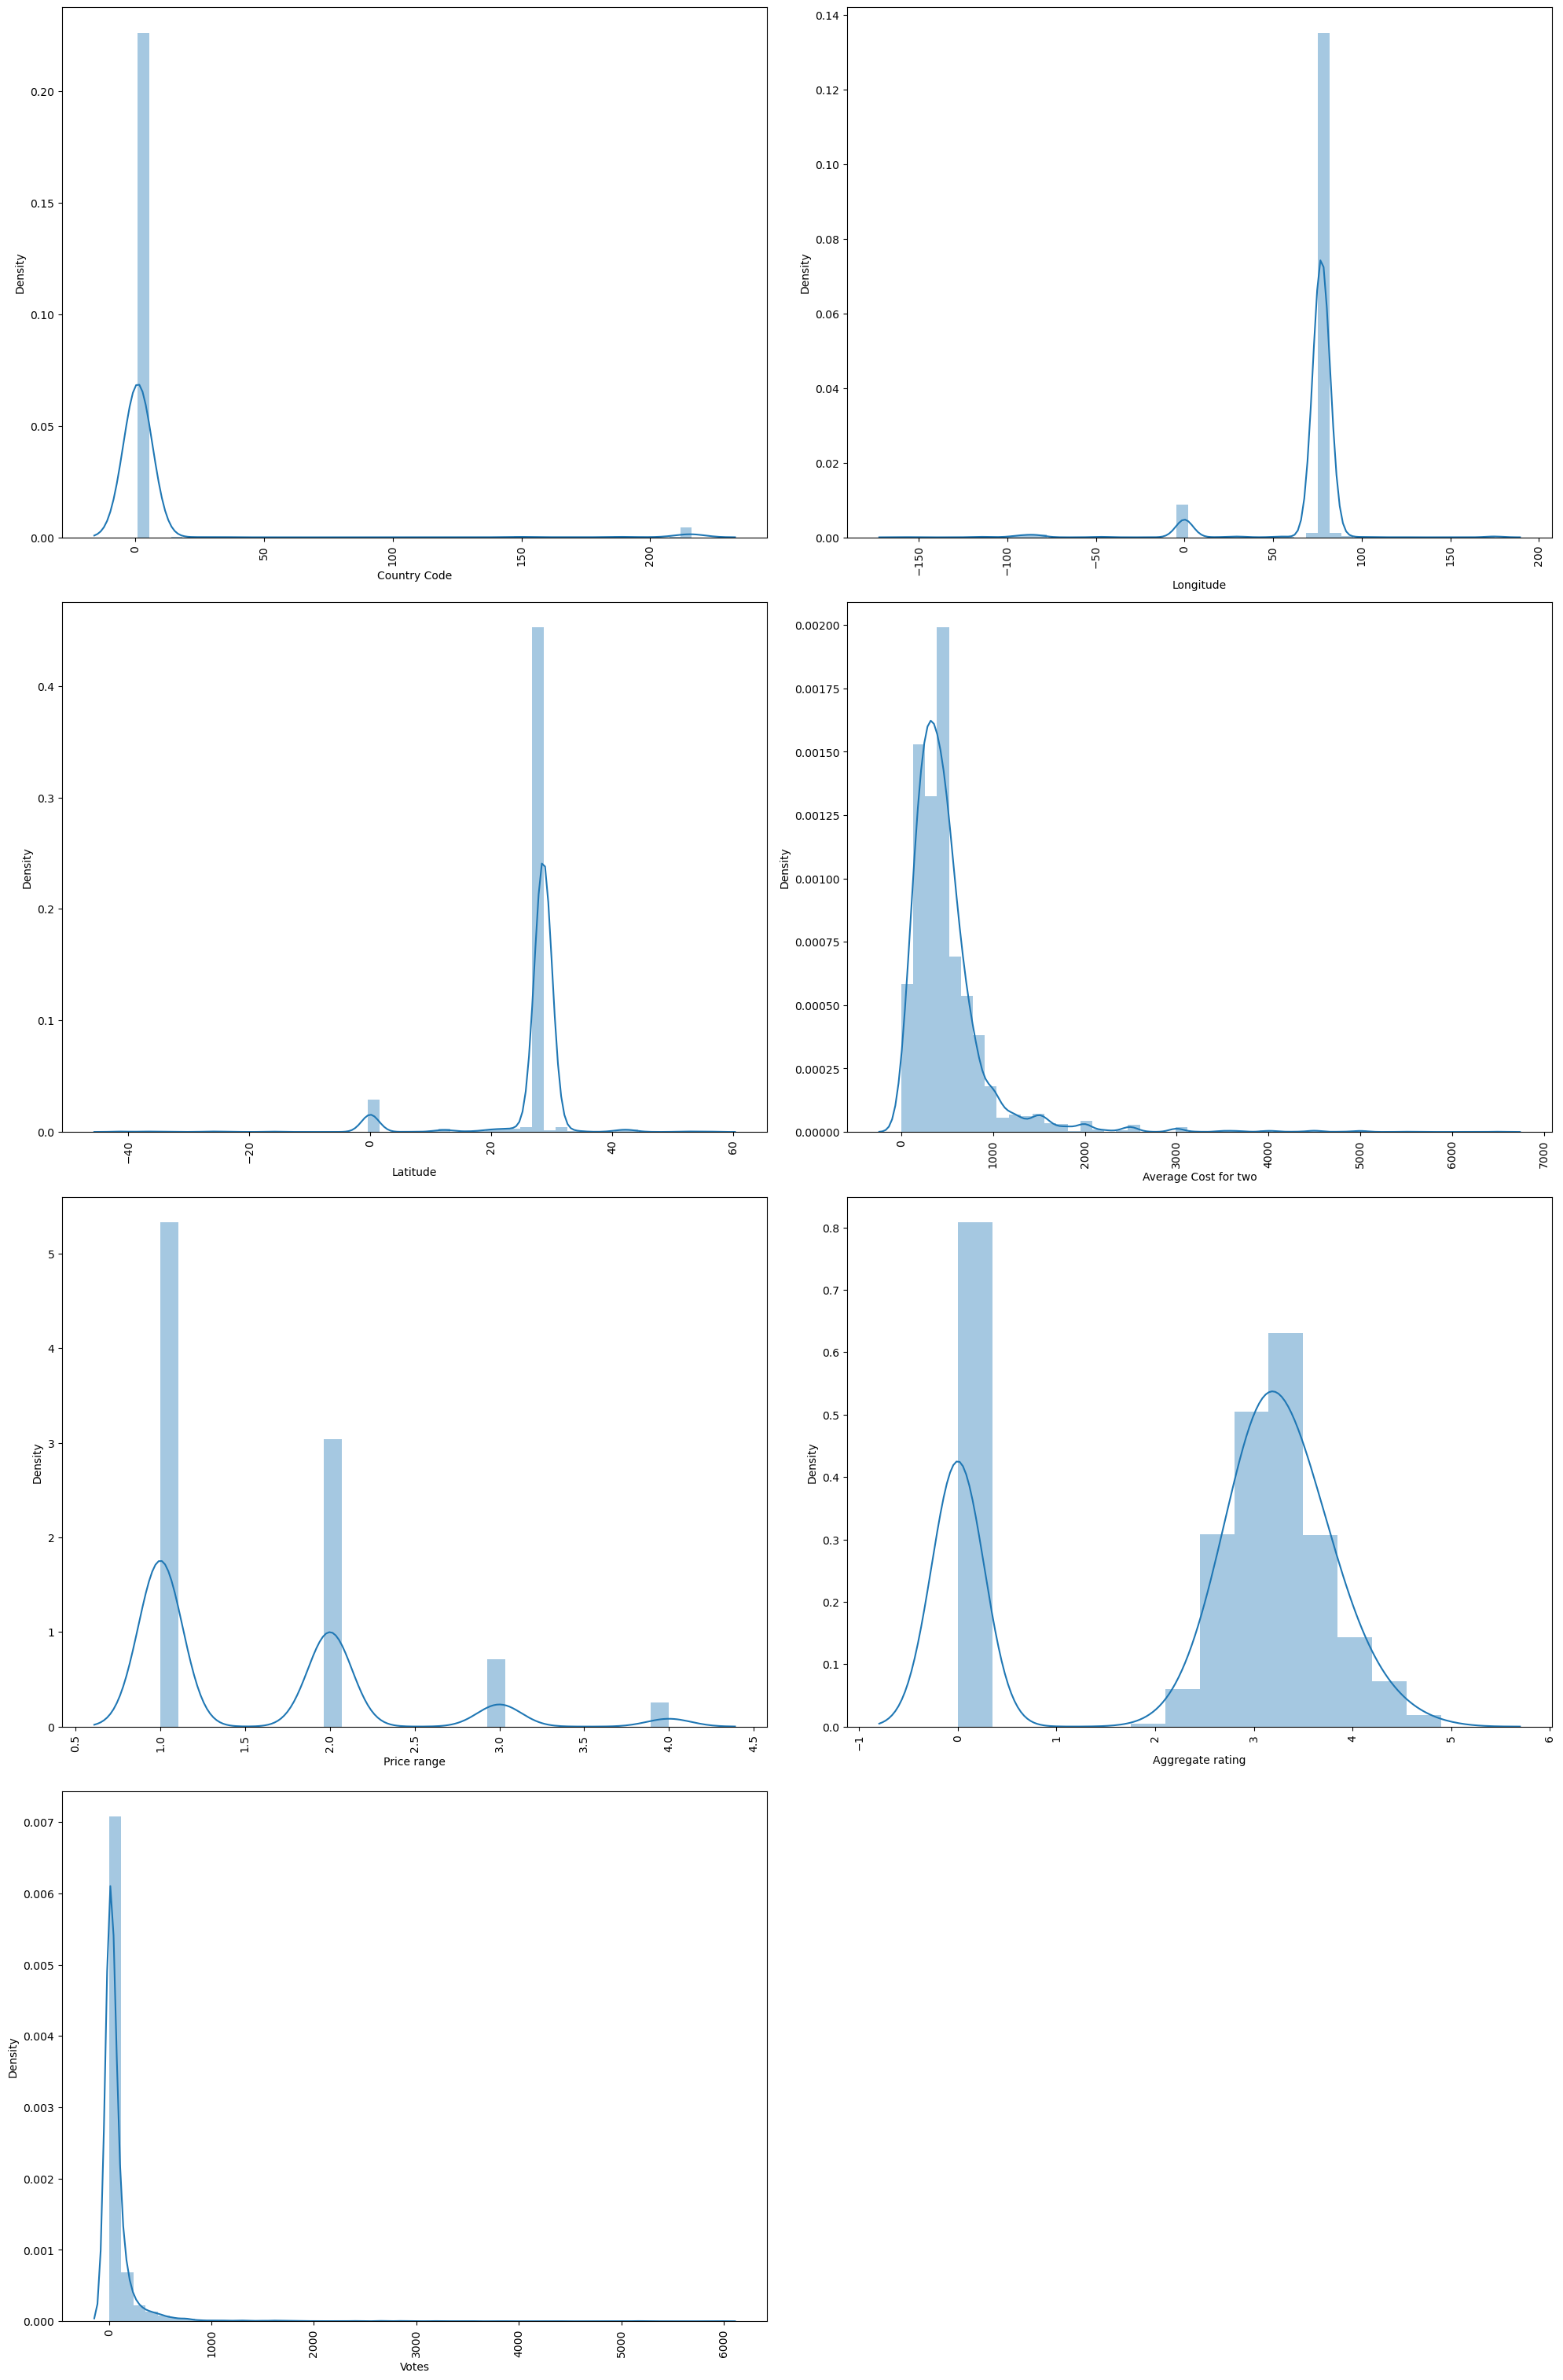

In [59]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 2, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Plotting Scatterplot**

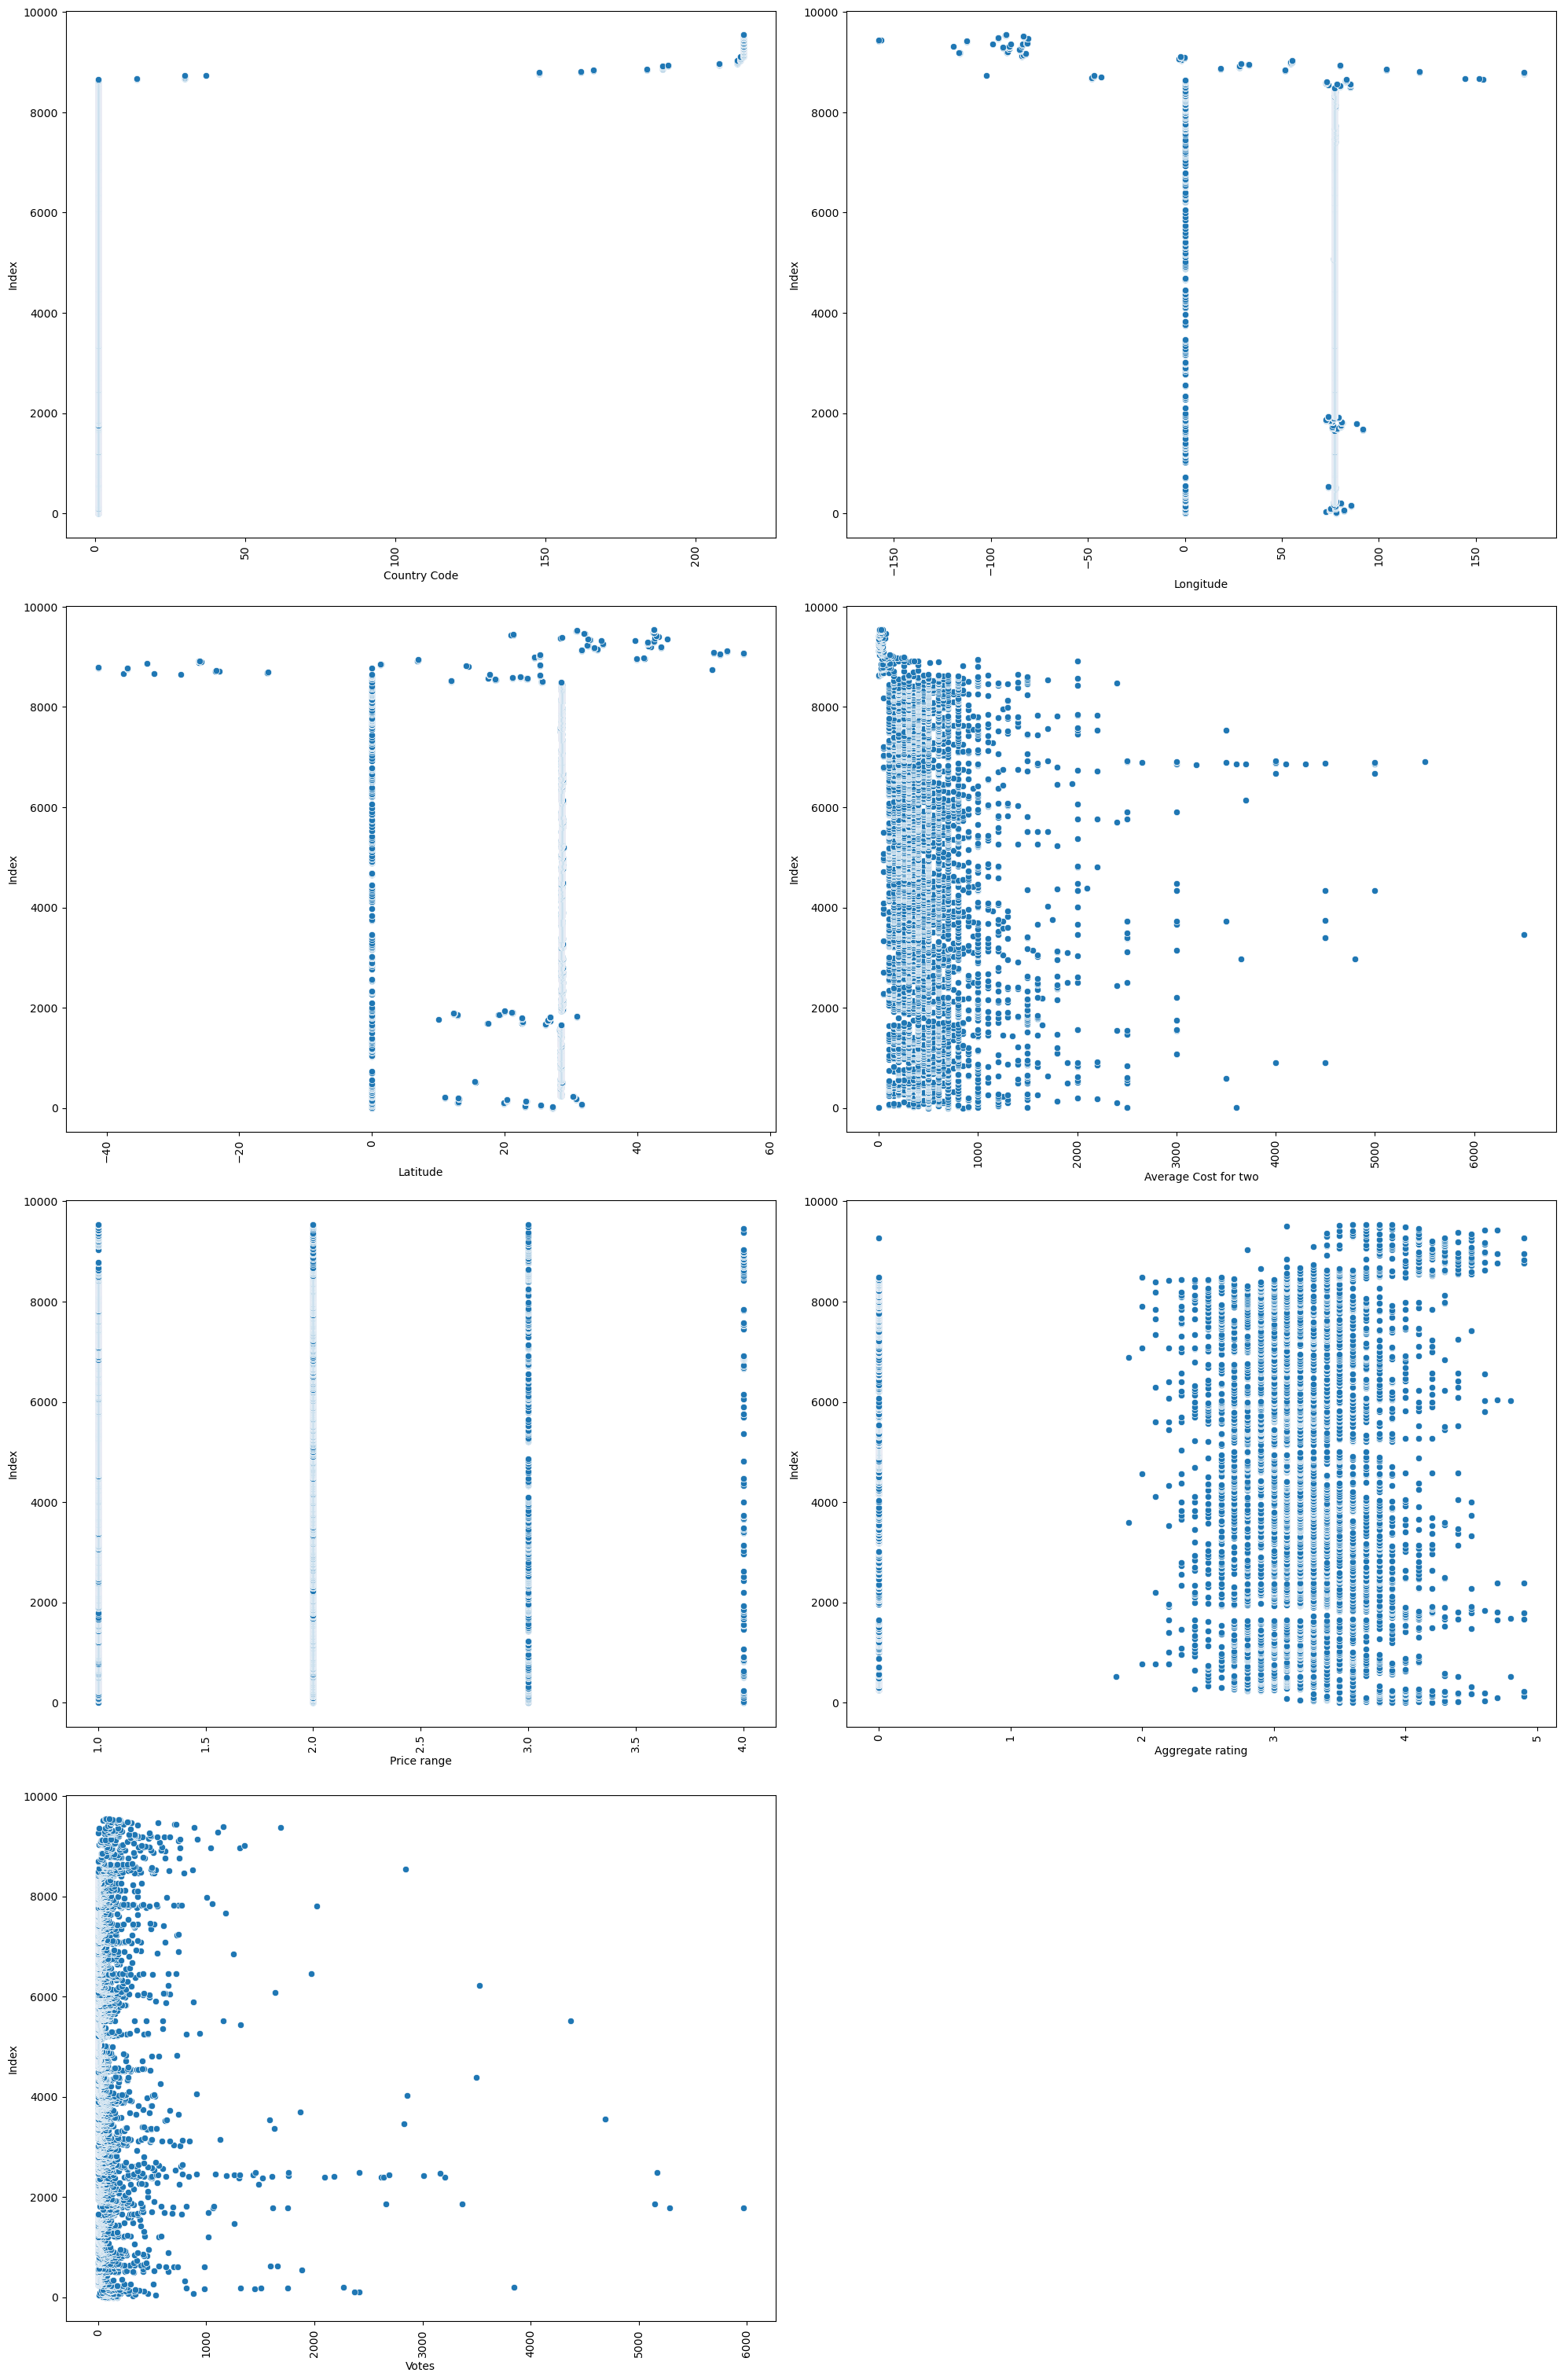

In [60]:
#we are plotting each numerical column against the index (row number) of the DataFrame
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=df.index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Index')

plt.tight_layout()
plt.show()

**Encoding categorical Feature**

In [61]:
# Using Label Encoder on categorical variable

le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.head()

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,2027,1,78.011544,27.161661,49,850,4,0,0,0,3,3.9,5,2,140
1,1,3,3373,1,0.000000,0.000000,49,700,4,0,0,0,2,3.5,5,2,71
2,1,3,4440,1,78.011608,27.160832,40,500,4,0,0,0,2,3.6,5,2,94
4,1,3,3123,1,78.007553,27.201725,44,1000,4,0,0,0,3,4.2,1,5,177
6,1,3,3111,1,78.044095,27.160934,49,2500,4,0,0,0,4,4.3,1,5,133


**Handling Outliers**

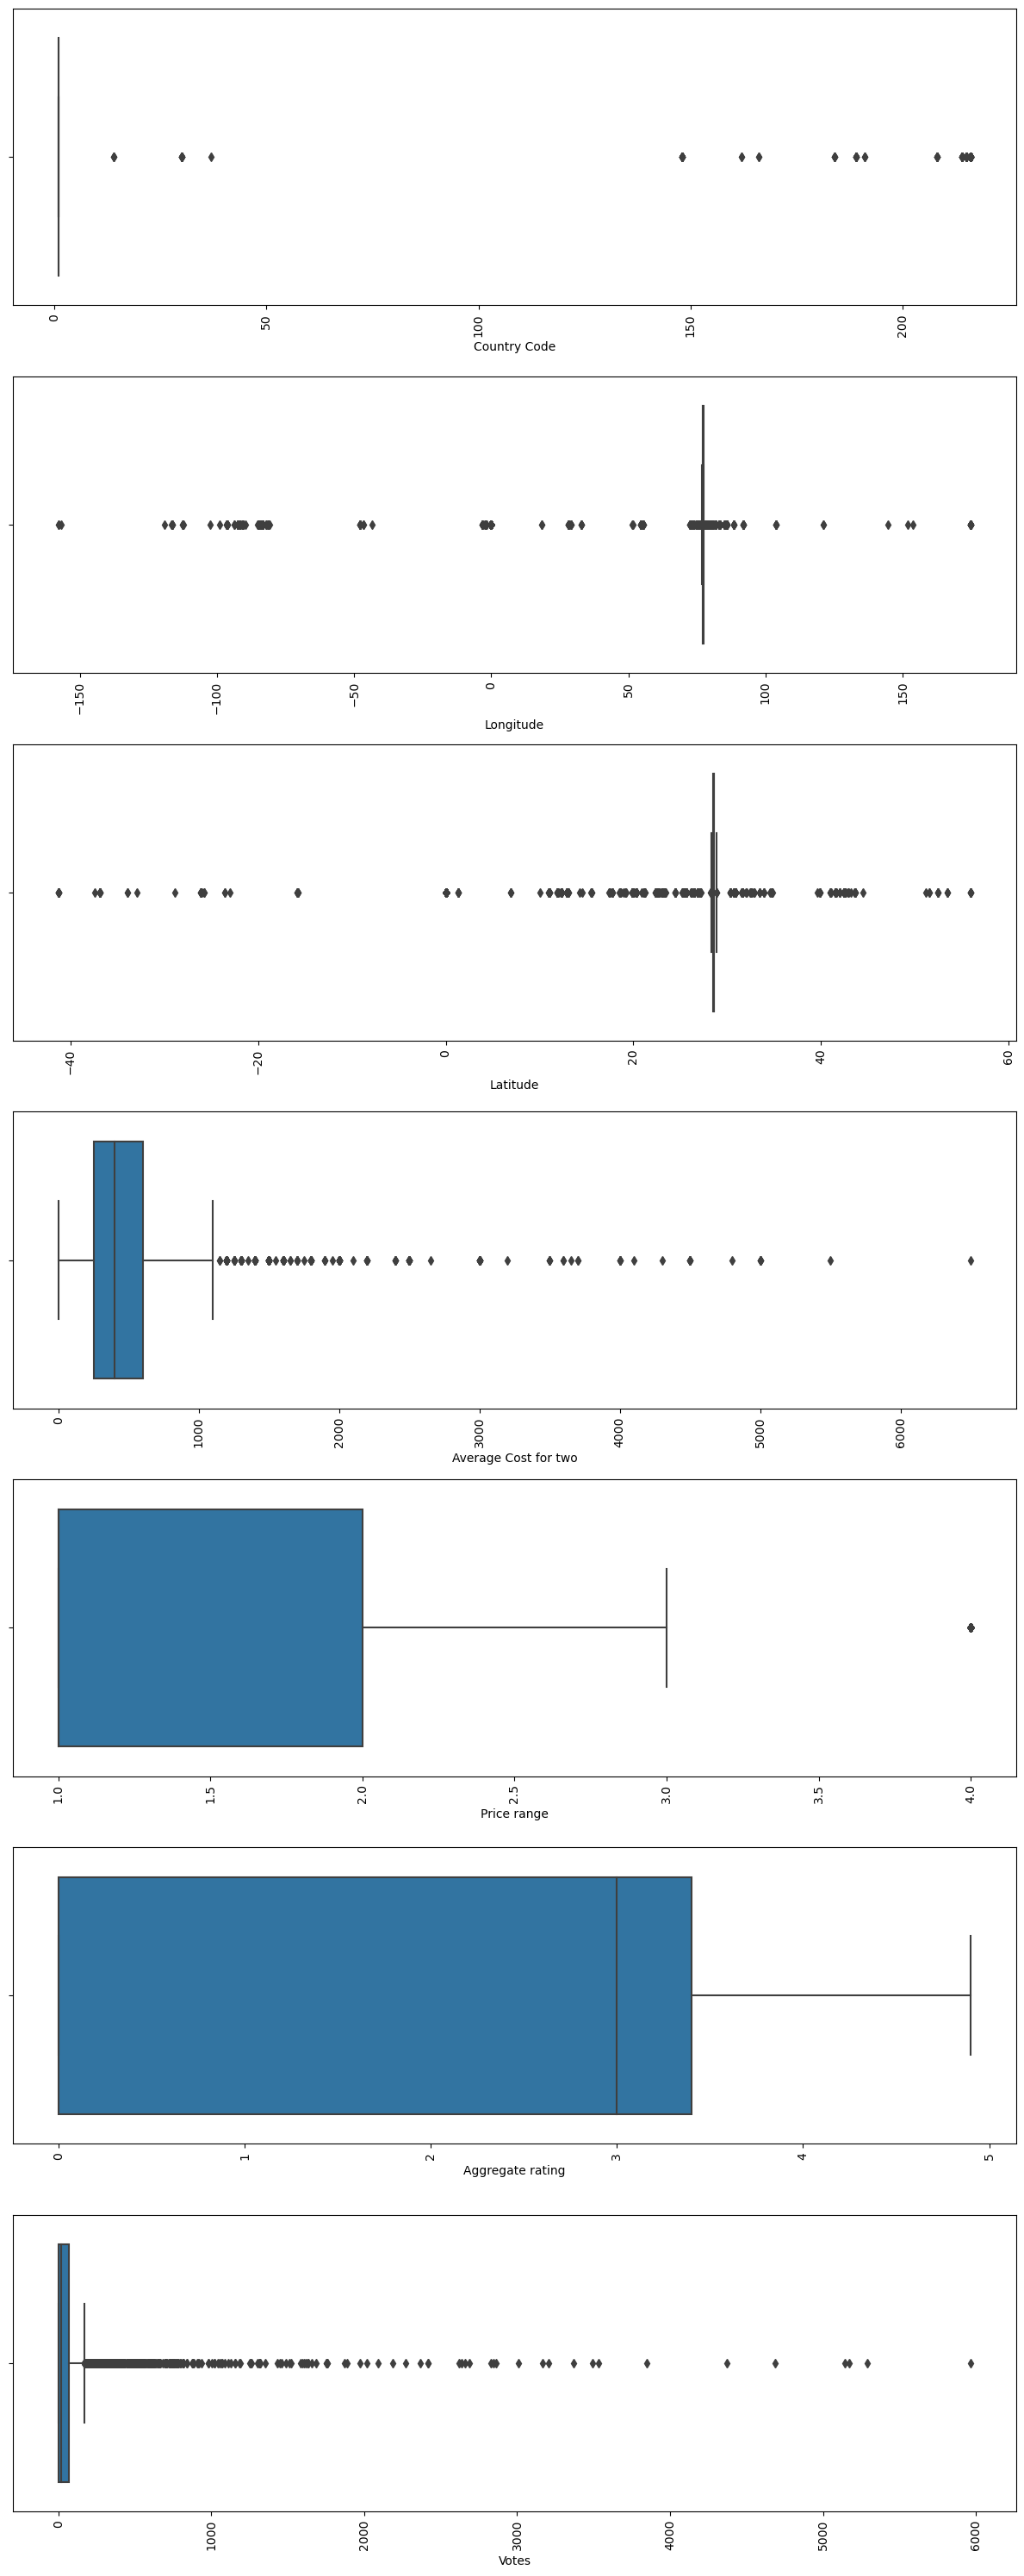

In [62]:
# Create the subplots
fig = plt.figure(figsize=(12, 30))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(7,1 , i + 1)
    sns.boxplot(data=df, x=col,)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

too many outliers present in the dataset .



**Handling Outliers using Z Score**

In [63]:
df.shape


(6328, 17)

In [64]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [65]:
df = remove_outliers_zscore(df,df.columns)
df

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
229,1,3,4053,26,78.054222,30.332735,41,550,4,0,0,0,3,3.8,5,2,230
230,1,3,4699,26,78.049117,30.328174,13,500,4,0,0,0,3,4.0,1,5,94
234,1,3,1351,26,78.040267,30.319528,49,600,4,0,0,0,3,3.9,5,2,121
242,1,3,2276,33,77.304776,28.490157,41,500,4,0,0,0,2,2.8,2,0,16
243,1,3,3218,33,77.305563,28.490137,40,150,4,0,0,0,1,2.8,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1,3,1064,85,83.001801,25.290468,40,800,4,0,0,0,3,3.3,2,0,96
8623,1,3,2653,85,82.982869,25.270943,16,600,4,0,0,0,3,3.5,5,2,172
8624,1,3,648,85,82.987294,25.334362,48,350,4,0,0,0,2,3.4,2,0,96
8625,1,3,4081,85,82.989291,25.332909,49,600,4,0,0,0,3,3.6,5,2,63


**checking the skewness of the data**

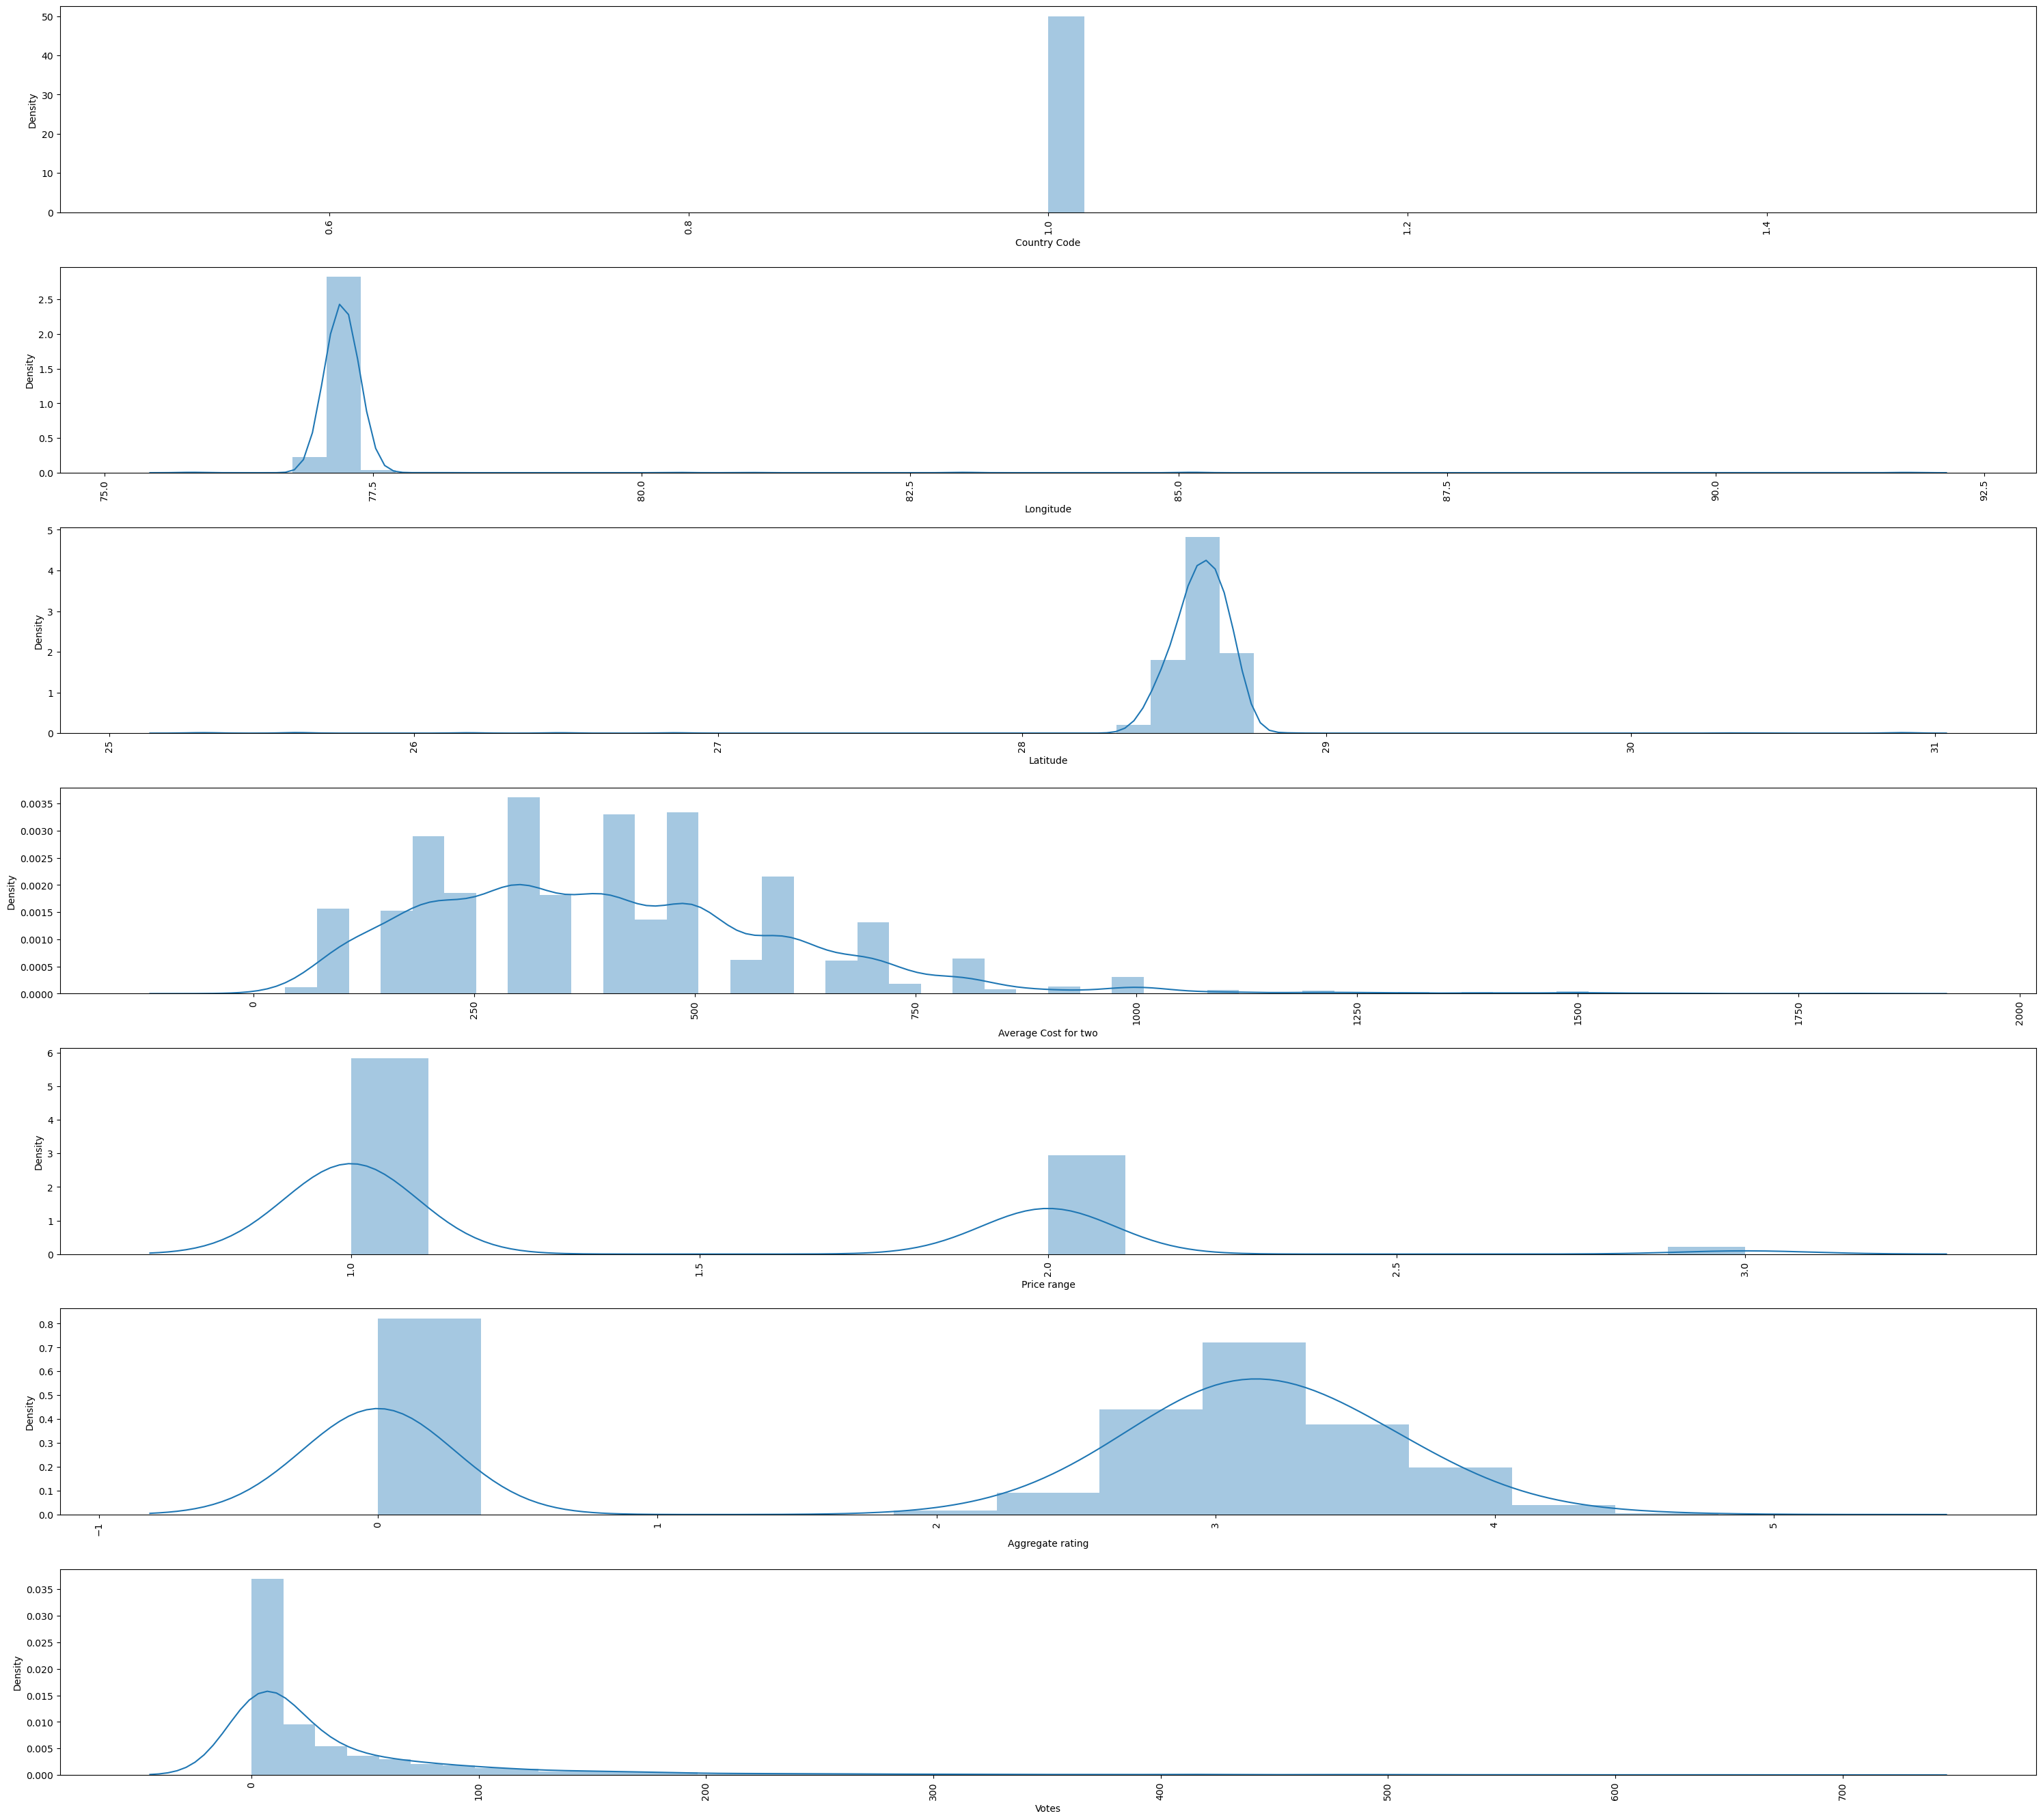

In [68]:
plt.figure(figsize=(30, 30))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 1, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [69]:
# using log transformation to remove skewness from the votes
df['Votes'] = np.log1p(df['Votes'])

**saving Cleaned Csv File**

In [71]:
df.to_csv('cleaned_zomato_data.csv', index=False)

**Checking Correlation with Target Column**

In [73]:
#correlation with target column

correlation_with_quality = df.corr()['Average Cost for two'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Average Cost for two    1.000000
Price range             0.850466
Votes                   0.406816
Aggregate rating        0.302407
Has Online delivery     0.301311
Rating text             0.118221
Rating color            0.105481
City                    0.082853
Longitude               0.059673
Latitude                0.058831
Restaurant Name         0.037249
Cuisines                0.034477
Country Code                 NaN
Country                      NaN
Currency                     NaN
Has Table booking            NaN
Is delivering now            NaN
Name: Average Cost for two, dtype: float64


<Axes: >

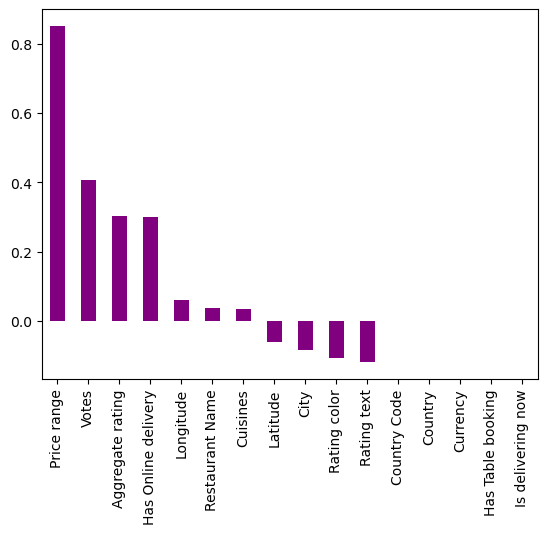

In [74]:
df.corr()['Average Cost for two'].drop(['Average Cost for two']).sort_values(ascending=False).plot(kind='bar', color='purple')


In [75]:
unnecessary_column = ['Is delivering now','Has Table booking','Currency','Country','Country Code']

df.drop(unnecessary_column,axis=1,inplace=True)

**Checking Correlation between columns to columns**

In [76]:
#checking correlation

df_corr = df.corr()
df_corr

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant Name,1.000000,0.005816,0.020703,-0.017800,0.050336,0.037249,0.037985,0.051248,-0.000493,-0.000690,0.012054,0.010261
City,0.005816,1.000000,0.039406,0.152610,0.045959,-0.082853,-0.031601,-0.083516,-0.025254,0.022206,0.006591,-0.016937
Longitude,0.020703,0.039406,1.000000,-0.764148,-0.009861,0.059673,-0.042251,0.112326,0.063686,-0.022889,0.034366,0.089057
Latitude,-0.017800,0.152610,-0.764148,1.000000,0.027837,-0.058831,0.007410,-0.109751,-0.047878,0.023161,-0.021938,-0.069681
Cuisines,0.050336,0.045959,-0.009861,0.027837,1.000000,0.034477,-0.050515,0.060898,-0.039658,-0.070632,-0.043465,-0.029559
Average Cost for two,0.037249,-0.082853,0.059673,-0.058831,0.034477,1.000000,0.301311,0.850466,0.302407,-0.105481,-0.118221,0.406816
Has Online delivery,0.037985,-0.031601,-0.042251,0.007410,-0.050515,0.301311,1.000000,0.284750,0.333748,-0.051227,-0.102683,0.442354
Price range,0.051248,-0.083516,0.112326,-0.109751,0.060898,0.850466,0.284750,1.000000,0.259518,-0.081725,-0.092515,0.366162
Aggregate rating,-0.000493,-0.025254,0.063686,-0.047878,-0.039658,0.302407,0.333748,0.259518,1.000000,-0.399139,-0.615586,0.846379
Rating color,-0.000690,0.022206,-0.022889,0.023161,-0.070632,-0.105481,-0.051227,-0.081725,-0.399139,1.000000,0.671061,-0.204182


**VIF**

In [77]:
df1=df.copy()

In [78]:
#drop target column
df1.drop('Average Cost for two',axis=1, inplace=True)

In [79]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [80]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [81]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Restaurant Name,1.006723
1,City,1.100828
2,Longitude,2.609657
3,Latitude,2.619625
4,Cuisines,1.028012
5,Has Online delivery,1.300751
6,Price range,1.225298
7,Aggregate rating,5.761747
8,Rating color,1.852794
9,Rating text,2.678128


There is no Multicollinearty we are good to go For Prediction

# 1. Predicting 'Average Cost for two'

**Splitting into Feature and Target column**

In [82]:
x= df.drop('Average Cost for two', axis=1)
y=df['Average Cost for two']

**Standardization**

In [83]:
sc=StandardScaler()

x=sc.fit_transform(x)

x

array([[ 1.27396382, -3.37946669,  1.18894924, ...,  1.57992276,
         0.39508671,  1.69421118],
       [ 1.74745316, -3.37946669,  1.18135475, ..., -1.68243377,
         2.40590906,  1.17110503],
       [-0.70648231, -3.37946669,  1.16818848, ...,  1.57992276,
         0.39508671,  1.31837113],
       ...,
       [-1.22175012,  2.84582949,  8.52767217, ..., -0.86684464,
        -0.94546152,  1.18337057],
       [ 1.29448658,  2.84582949,  8.53064256, ...,  1.57992276,
         0.39508671,  0.93856232],
       [ 1.64483937,  2.84582949,  8.5342185 , ...,  1.57992276,
         0.39508671,  1.25741415]])

# Model Building


**Find best Randomstate**

In [85]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(x,y,random_state=i,test_size=.25)
    LR= LinearRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7654582618481489 on Random State = 64


In [86]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=.25,random_state=maxRS)


**Defining All Regression Models**

In [87]:
# Create instances of regression models

LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models

model = [LR_model, RFR_model, GB_model, ADA_model, DT_model, KNR_model]

In [88]:
for reg_model in model:
    reg_model.fit(X_train, Y_train)
    train_pred = reg_model.predict(X_train)
    test_pred = reg_model.predict(X_test)
    
    # R-squared (Coefficient of Determination)
    r2_train = r2_score(Y_train, train_pred)
    r2_test = r2_score(Y_test, test_pred)
    
    # Mean Squared Error (MSE)
    mse_train = mean_squared_error(Y_train, train_pred)
    mse_test = mean_squared_error(Y_test, test_pred)
    
    # Mean Absolute Error (MAE)
    mae_train = mean_absolute_error(Y_train, train_pred)
    mae_test = mean_absolute_error(Y_test, test_pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE) - Train:', mse_train)
    print('Mean Squared Error (MSE) - Test:', mse_test)
    print('Mean Absolute Error (MAE) - Train:', mae_train)
    print('Mean Absolute Error (MAE) - Test:', mae_test)
    print('--' * 30)

Model: LinearRegression()
R-squared (Train): 0.7262821248845235
R-squared (Test): 0.7654582618481489
Mean Squared Error (MSE) - Train: 12378.75899125304
Mean Squared Error (MSE) - Test: 11621.946949256448
Mean Absolute Error (MAE) - Train: 89.92945213638076
Mean Absolute Error (MAE) - Test: 87.33376828156004
------------------------------------------------------------
Model: RandomForestRegressor()
R-squared (Train): 0.9743852147201277
R-squared (Test): 0.8300770659531058
Mean Squared Error (MSE) - Train: 1158.4163199369582
Mean Squared Error (MSE) - Test: 8419.973947990544
Mean Absolute Error (MAE) - Train: 25.7374573154715
Mean Absolute Error (MAE) - Test: 71.26792750197005
------------------------------------------------------------
Model: GradientBoostingRegressor()
R-squared (Train): 0.8373552282102638
R-squared (Test): 0.8278468564855411
Mean Squared Error (MSE) - Train: 7355.531421991003
Mean Squared Error (MSE) - Test: 8530.48466698669
Mean Absolute Error (MAE) - Train: 68.9129

**CrossValidation**

In [91]:
for reg_model in model:
    reg_model.fit(X_train, Y_train)
    r2_test = r2_score(Y_test, reg_model.predict(X_test))
    
    cv_r2 = cross_val_score(reg_model, x, y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('-- '* 50)

Model: LinearRegression()
R-squared (Test): 0.7654582618481489
Cross-validation R-squared: 0.6314338866141525
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Model: RandomForestRegressor()
R-squared (Test): 0.8288612198951397
Cross-validation R-squared: 0.8060988504523736
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Model: GradientBoostingRegressor()
R-squared (Test): 0.8281189797705855
Cross-validation R-squared: 0.7946770698136861
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Model: AdaBoostRegressor()
R-squared (Test): 0.7468542403863736
Cross-validation R-squared: 0.7196252412481365
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

# GradientBoostingRegressor is beast model

**Hyperparameter tuning on GradientBoostingRegressor**

In [93]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}
param_grid

{'n_estimators': [50, 100, 150],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3],
 'subsample': [0.8, 0.9, 1.0]}

In [94]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [95]:
grid_search.best_estimator_


GradientBoostingRegressor(max_depth=5, min_samples_split=4, n_estimators=150,
                          subsample=0.9)

In [96]:
grid_search.best_params_


{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150,
 'subsample': 0.9}

**Saving the Model**

In [97]:
joblib.dump(grid_search.best_estimator_,'GBpred.obj')

['GBpred.obj']

# 2.Predicting Price Range

In [98]:
# loading cleaned csv


In [99]:
data = pd.read_csv('cleaned_dataset.csv')
data

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,4053,26,78.054222,30.332735,41,550,4,0,0,0,3,3.8,5,2,5.442418
1,1,3,4699,26,78.049117,30.328174,13,500,4,0,0,0,3,4.0,1,5,4.553877
2,1,3,1351,26,78.040267,30.319528,49,600,4,0,0,0,3,3.9,5,2,4.804021
3,1,3,2276,33,77.304776,28.490157,41,500,4,0,0,0,2,2.8,2,0,2.833213
4,1,3,3218,33,77.305563,28.490137,40,150,4,0,0,0,1,2.8,2,0,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,1,3,1064,85,83.001801,25.290468,40,800,4,0,0,0,3,3.3,2,0,4.574711
5072,1,3,2653,85,82.982869,25.270943,16,600,4,0,0,0,3,3.5,5,2,5.153292
5073,1,3,648,85,82.987294,25.334362,48,350,4,0,0,0,2,3.4,2,0,4.574711
5074,1,3,4081,85,82.989291,25.332909,49,600,4,0,0,0,3,3.6,5,2,4.158883


**Checking Correlation with Target Column**

In [100]:
correlation_with_quality = data.corr()['Price range'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Price range             1.000000
Average Cost for two    0.850466
Votes                   0.366162
Has Online delivery     0.284750
Aggregate rating        0.259518
Longitude               0.112326
Latitude                0.109751
Rating text             0.092515
City                    0.083516
Rating color            0.081725
Cuisines                0.060898
Restaurant Name         0.051248
Country Code                 NaN
Country                      NaN
Currency                     NaN
Has Table booking            NaN
Is delivering now            NaN
Name: Price range, dtype: float64


<Axes: >

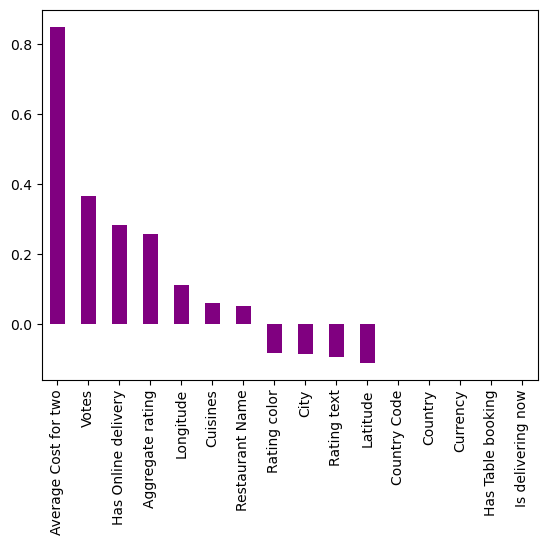

In [101]:
data.corr()['Price range'].drop(['Price range']).sort_values(ascending=False).plot(kind='bar', color='purple')


In [102]:
unnecessary_features = ['Is delivering now','Has Table booking','Currency','Country','Country Code']

data.drop(unnecessary_features,axis=1,inplace=True)

**VIF**

In [103]:
df2=data.copy()


#drop target column
df2.drop('Price range',axis=1, inplace=True)


#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df2)


standard=pd.DataFrame(standard, columns=df2.columns)


VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Restaurant Name,1.005892
1,City,1.100877
2,Longitude,2.603837
3,Latitude,2.619572
4,Cuisines,1.024138
5,Average Cost for two,1.253532
6,Has Online delivery,1.298979
7,Aggregate rating,5.753163
8,Rating color,1.856432
9,Rating text,2.678654


There is no Multicollinearty we are good to go For Prediction

**Splitting into Feature and Target column**

In [104]:
X= data.drop('Price range', axis=1)
Y=data['Price range']


**Standardization**

In [105]:
sc=StandardScaler()


X=sc.fit_transform(X)


**Data Balancing**

In [106]:
sm=SMOTE()


x,y=sm.fit_resample(X,Y)

x.shape , y.shape


((9888, 11), (9888,))

# Model Building


In [107]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.993933265925177 on Random State = 12


In [108]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)


**Defining All Classification Models**

In [109]:
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

**Model training**

In [110]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 99.3933265925177
Confusion Matrix of  LogisticRegression()  is 
 [[659   0   0]
 [  0 658   5]
 [  0   7 649]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       659
           2       0.99      0.99      0.99       663
           3       0.99      0.99      0.99       656

    accuracy                           0.99      1978
   macro avg       0.99      0.99      0.99      1978
weighted avg       0.99      0.99      0.99      1978

******************************
Accuracy_Score of  DecisionTreeClassifier() is 99.84833164812943
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[659   0   0]
 [  0 660   3]
 [  0   0 656]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       659
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       656

    accuracy                           1.00      1978

**CrossValidation**

In [111]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('--'*50)

Accuracy_Score of  LogisticRegression() is 99.3933265925177
cross Validation accuracy score of  LogisticRegression()  is  98.44267723921149
----------------------------------------------------------------------------------------------------
Accuracy_Score of  DecisionTreeClassifier() is 99.84833164812943
cross Validation accuracy score of  DecisionTreeClassifier()  is  99.8685336373349
----------------------------------------------------------------------------------------------------
Accuracy_Score of  SVC() is 99.74721941354903
cross Validation accuracy score of  SVC()  is  99.07973034691675
----------------------------------------------------------------------------------------------------
Accuracy_Score of  KNeighborsClassifier() is 97.37108190091
cross Validation accuracy score of  KNeighborsClassifier()  is  93.15430279355151
----------------------------------------------------------------------------------------------------
Accuracy_Score of  RandomForestClassifier() is 99.94944

# GradientBoostingClassifier gave best accuracy score and minimum difference for generalise model

**Hyperparameter tuning on GradientBoostingClassifier**

In [112]:
param_grid = {
    'n_estimators': [200, 600, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 4, 7]
}
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [113]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [114]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                           min_samples_split=3, n_estimators=200)

In [115]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9994944388270981

**Confusion matrix**

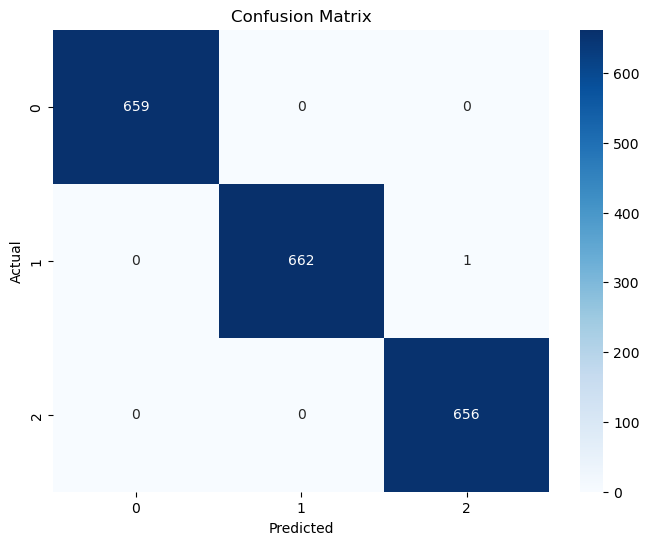

In [116]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Saving the Model**

In [118]:
joblib.dump(grid_search.best_estimator_,'price_range.obj')

['price_range.obj']